# Plotting data with Python - `matplotlib`

* Python has [LOTS](https://pyviz.org/overviews/index.html) of data visualization (plotting) libraries
* Lots of them are built on top of `matplotlib`
* `matplotlib` tries to make easy things easy and hard things possible

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import QTable
from astropy import units as u

### Simple Plotting

$$\large
[\ 0 < x < 3\pi\ ] \hspace{1cm}
y = e^{-x/3} \cos(\pi x)
$$

In [2]:
my_arrayx = np.linspace(0, 3*np.pi, 250)
my_arrayy = np.cos(np.pi * my_arrayx) * np.exp(-my_arrayx / 3)

In [3]:
my_table = QTable(
    {'Time': my_arrayx, 
    'Voltage': my_arrayy}
)

In [4]:
my_table[0:4]

Time,Voltage
float64,float64
0.0,1.0
0.03785051389867221,0.980489381712741
0.07570102779734442,0.9476368231016002
0.11355154169601663,0.9022381066700058


### Add a unit to a QTable column

In [5]:
my_table['Time'].unit = u.s
my_table['Voltage'].unit = u.V

In [6]:
my_table[0:4]

Time,Voltage
s,V
float64,float64
0.0,1.0
0.03785051389867221,0.980489381712741
0.07570102779734442,0.9476368231016002
0.11355154169601663,0.9022381066700058


In [7]:
my_x = my_table['Time']
my_y = my_table['Voltage']

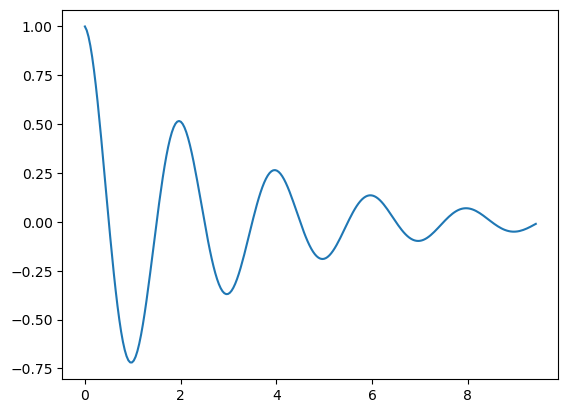

In [8]:
plt.plot(my_x, my_y)

### Simple plotting - with *style*

* The default style of `matplotlib` is a bit lacking in style.
* The new version of `matplotlib` has added some new styles that you can use in place of the default.
* Changing the style will effect all of the rest of the plots on the notebook.

Examples of the various styles can be found [here](http://matplotlib.org/examples/style_sheets/style_sheets_reference.html)

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [10]:
plt.style.use('ggplot')

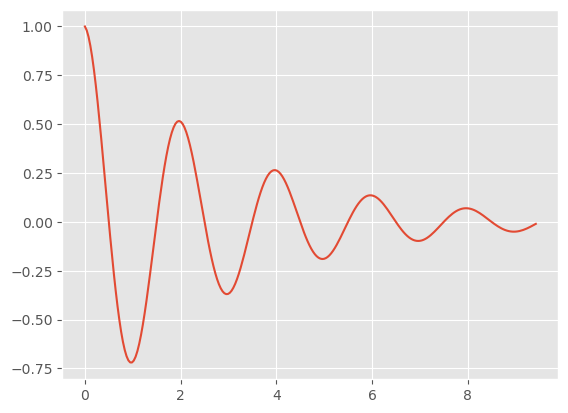

In [11]:
plt.plot(my_x, my_y);

Adding the `;` at the end suppresses the `Out[]` line

---

# Better plotting

* The simple plots: `plt.plot()` are great for a quick look at data, but it does not provide
much control over the plot.
* The `fig,ax` interface lets you control everything!
- `figsize = (width, height)` in inches.
- `constrained_layout = True`  cleans up the figure, reducing noise and avoiding text overlapping.

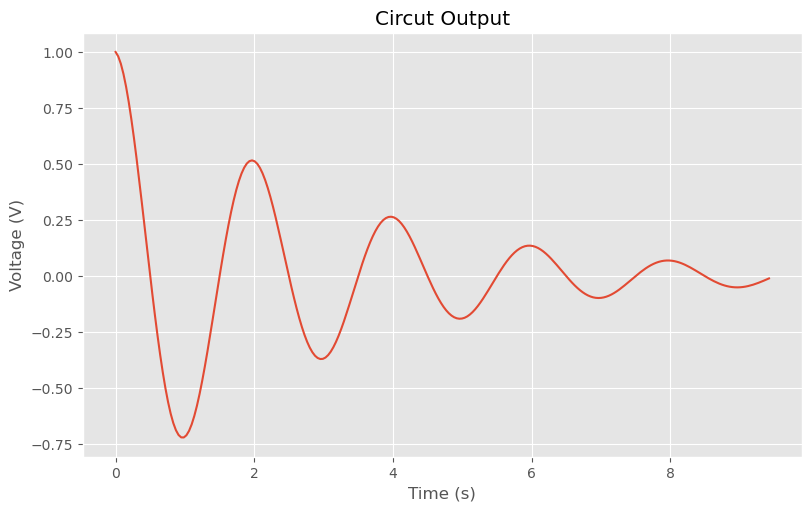

In [12]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.set_xlabel(f'Time ({my_x.unit})')
ax.set_ylabel(f'Voltage ({my_y.unit})')
ax.set_title('Circut Output')

ax.plot(my_x, my_y);

### You can change units and use the same plotting code

In [13]:
my_x = my_table['Time'].to(u.ms)
my_y = my_table['Voltage'].to(u.mV)

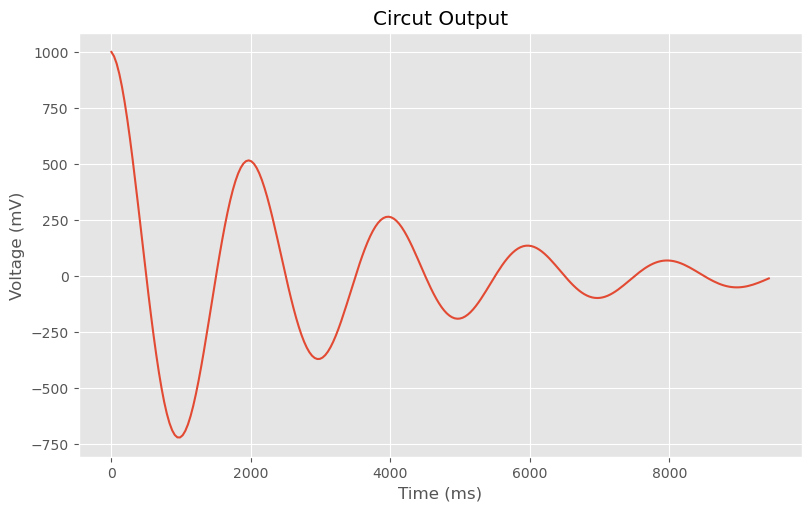

In [14]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.set_xlabel(f'Time ({my_x.unit})')
ax.set_ylabel(f'Voltage ({my_y.unit})')
ax.set_title('Circut Output')

ax.plot(my_x, my_y);

---

#### Colors, Markers, and Linestyles

##### [Complete Marker List](https://matplotlib.org/api/markers_api.html)

---

### In addition, you can specify colors in many different ways:

- Grayscale intensities: `color = '0.8'`
- RGB triplets: `color = (0.3, 0.1, 0.9)`
- RGB triplets (with transparency): `color = (0.3, 0.1, 0.9, 0.4)`
- Hex strings: `color = '#7ff00'`
- [HTML color names](https://en.wikipedia.org/wiki/Web_colors): `color = 'Chartreuse'`
- a name from the [xkcd color survey](https://xkcd.com/color/rgb/): `color = 'xkcd:poison green'`)

---

### Font stuff (not all fonts/sizes have all properties)

* `fontfamily` {FONTNAME, 'serif', 'sans-serif', 'monospace'}
* `fontsize` {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
* `fontstyle` {'normal', 'italic', 'oblique'}
* `fontweight` {a numeric value in range 0-1000, 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'}

---

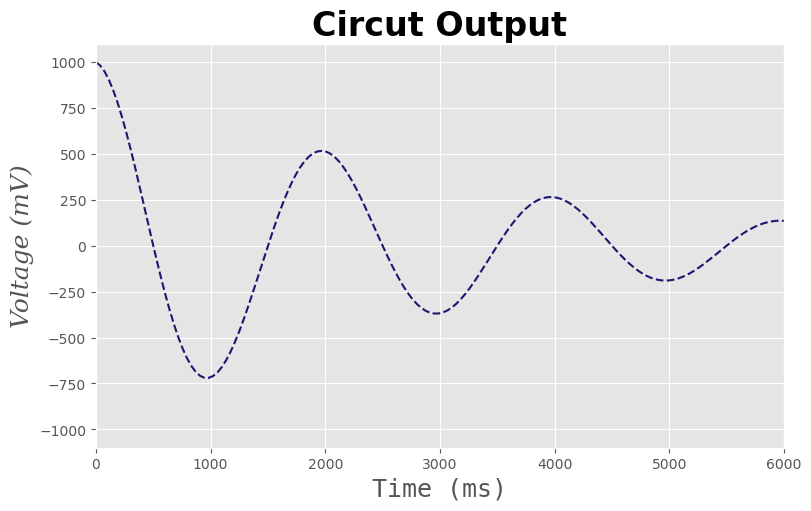

In [15]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.set_xlim(0.0, 6000)
ax.set_ylim(-1100, 1100)

ax.set_xlabel(f'Time ({my_x.unit})',
              fontfamily = 'monospace',
              fontsize = 18)

ax.set_ylabel(f'Voltage ({my_y.unit})',
              fontfamily = 'serif',
              fontstyle = 'italic',
              fontsize = 18)

ax.set_title('Circut Output', 
             fontsize = 24, 
             fontweight = 'bold')

ax.plot(my_x, my_y,
        color = 'MidnightBlue',
        marker = 'None',
        linestyle = '--');

---

## Histograms

In [16]:
grade_table = QTable.read('https://uwashington-astro300.github.io/A300_Data/Grades.csv', format='ascii.csv')

In [17]:
grade_table[0:3]

Exam1,Exam2,Quarter
int64,int64,str8
80,70,Aut_2002
58,38,Aut_2003
69,44,Aut_2003


### Histogram Types

- `stepfilled`: step curve that has a color fill
- `step`: step curve with **no** color fill

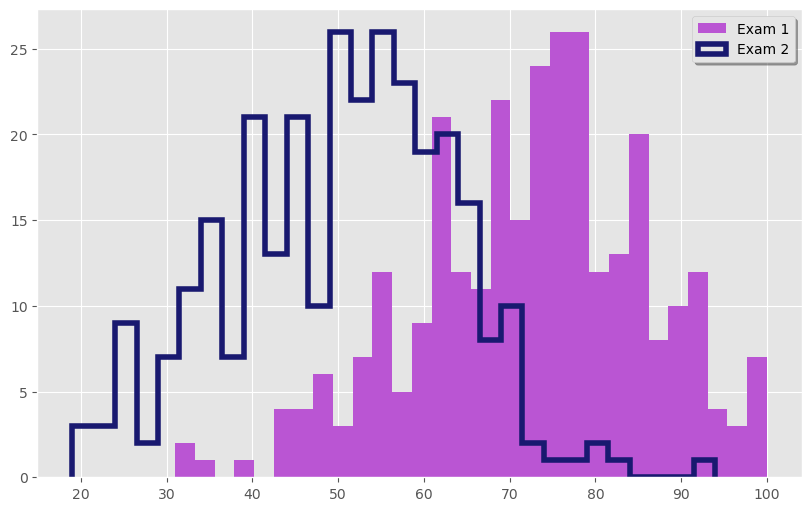

In [18]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

# Histogram of the values of column 1 (Exam1)

ax.hist(grade_table['Exam1'],
        bins = 30,
        histtype = 'stepfilled',
        facecolor = 'MediumOrchid',
        label = "Exam 1")

# Histogram of the values of column 2 (Exam2)

ax.hist(grade_table['Exam2'],
        bins = 30,
        histtype = 'step',
        color = 'MidnightBlue',
        linewidth = 4,
        label = "Exam 2")

ax.legend(loc=0, shadow=True);

### Side Topic - Histogram Bins

* Plotting a histogram of two datasets with a different number of elements using the same bin number can lead to a misleading plot
* You can fix this by defining your bins

In [19]:
# Create a sub-set of the data

some_grades = grade_table[(grade_table['Exam2'] > 40.0) & 
                          (grade_table['Exam2'] < 80.0)]

some_grades[0:3]

Exam1,Exam2,Quarter
int64,int64,str8
80,70,Aut_2002
69,44,Aut_2003
79,50,Spr_2003


In [20]:
len(grade_table['Quarter'])

300

In [21]:
len(some_grades['Quarter'])

226

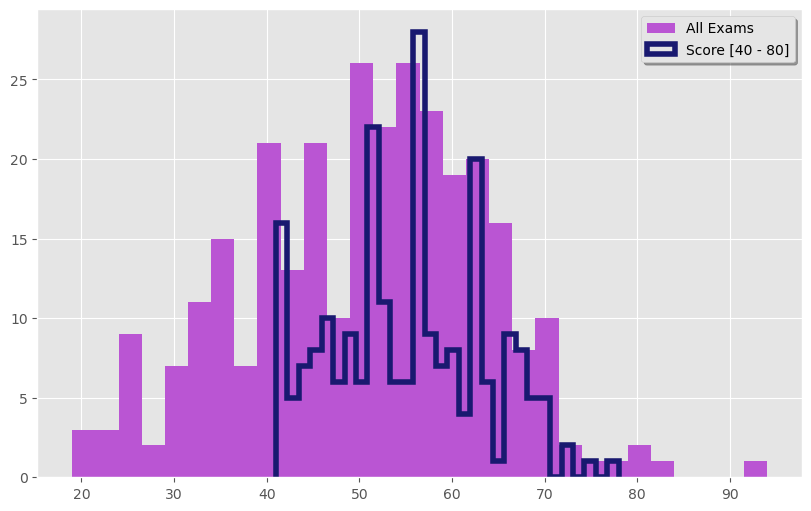

In [22]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.hist(grade_table['Exam2'],
        bins = 30,
        histtype = 'stepfilled',
        facecolor = 'MediumOrchid',
        label = "All Exams")

ax.hist(some_grades['Exam2'],
        bins = 30,
        histtype = 'step',
        color = 'MidnightBlue',
        linewidth = 4,
        label = "Score [40 - 80]")

ax.legend(loc=0, shadow=True);

In [23]:
my_bins = np.arange(18,95,2)
my_bins

array([18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50,
       52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84,
       86, 88, 90, 92, 94])

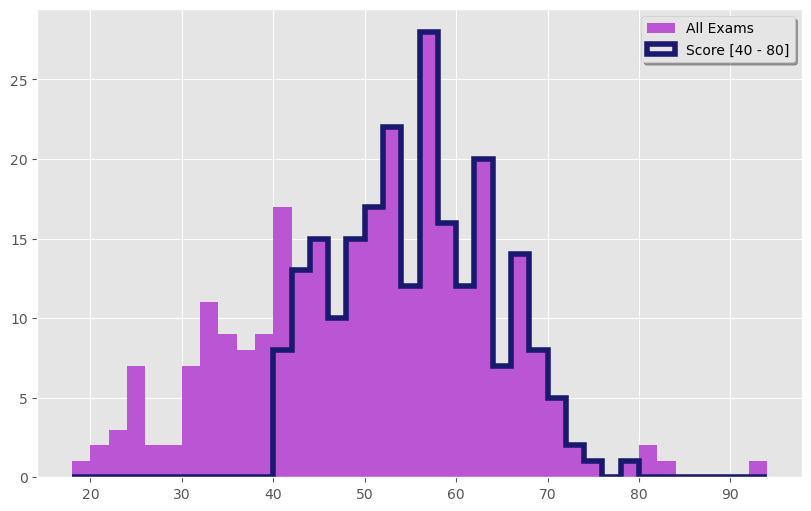

In [24]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.hist(grade_table['Exam2'],
        bins = my_bins,
        histtype = 'stepfilled',
        facecolor = 'MediumOrchid',
        label = "All Exams")

ax.hist(some_grades['Exam2'],
        bins = my_bins,
        histtype = 'step',
        color = 'MidnightBlue',
        linewidth = 4,
        label = "Score [40 - 80]")

ax.legend(loc=0, shadow=True);

---

## Adding text and lines

* `.vlines(x, ymin, ymax)`
* `.hlines(y, xmin, xmax)`
* `.text(X, Y, 'text')`

In [25]:
my_average = grade_table['Exam2'].mean()
my_std = grade_table['Exam2'].std()

In [26]:
my_average, my_std

(50.35, 12.839035529716917)

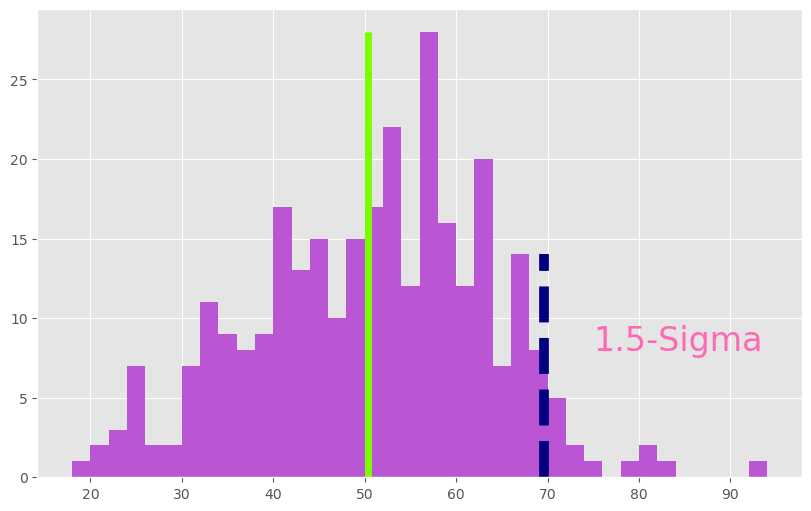

In [27]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.hist(grade_table['Exam2'],
        bins = my_bins,
        histtype = 'stepfilled',
        facecolor = 'MediumOrchid')

ax.vlines(my_average, 0, 28,
          color = 'LawnGreen',
          linewidth = 5,
          linestyle = '-')

ax.vlines(my_average + (1.5 * my_std), 0, 14,
          color = 'Navy',
          linewidth = 7,
          linestyle = '--')

ax.text(75, 8,
       '1.5-Sigma',
        color='HotPink',
        fontsize = 24);

----

## Subplots - Multiple panels in a single plot frame.

- You layout your panels using simple ASCII art.
- The convention is to use single capital letters
- Access each panel with the single letter (i.e. `['A']`)
- X/Y axes labels have to be added to each subplot separately
- The example below show the ASCII art and the resulting layout

<img src="https://uwashington-astro300.github.io/A300_images/Mosaic.jpg" width="700"/>

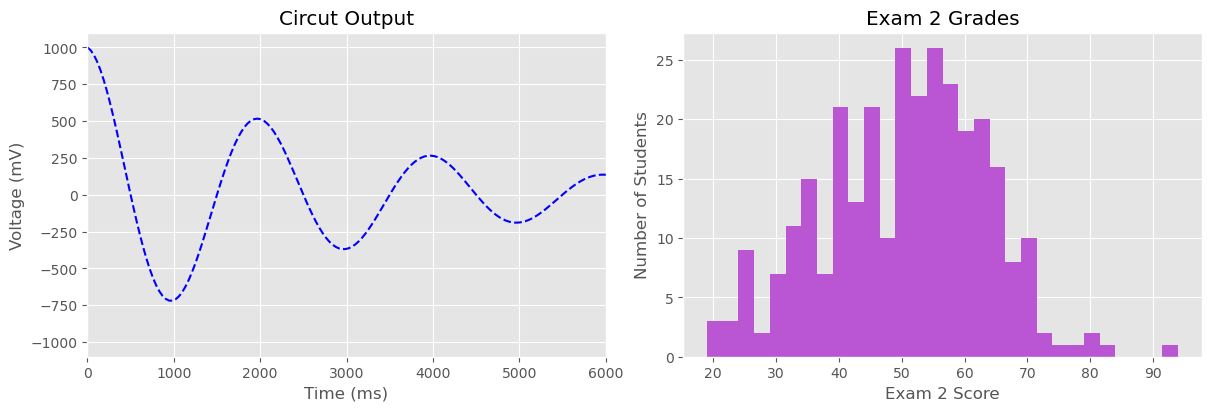

In [28]:
fig, ax = plt.subplot_mosaic(
    '''
    AB
    ''',
    figsize = (12, 4), 
    constrained_layout = True
)

# Plot at ['A']

ax['A'].set_xlim(0.0, 6000)
ax['A'].set_ylim(-1100, 1100)

ax['A'].plot(my_x, my_y,
           color = 'b',
           marker = 'None',
           linestyle = '--')

ax['A'].set_xlabel(f'Time ({my_x.unit})')
ax['A'].set_ylabel(f'Voltage ({my_y.unit})')
ax['A'].set_title('Circut Output')

# Plot at ['B']

ax['B'].hist(grade_table['Exam2'],
           bins = 30,
           histtype = 'stepfilled',
           facecolor = 'MediumOrchid')

ax['B'].set_title('Exam 2 Grades')
ax['B'].set_xlabel('Exam 2 Score')
ax['B'].set_ylabel('Number of Students');

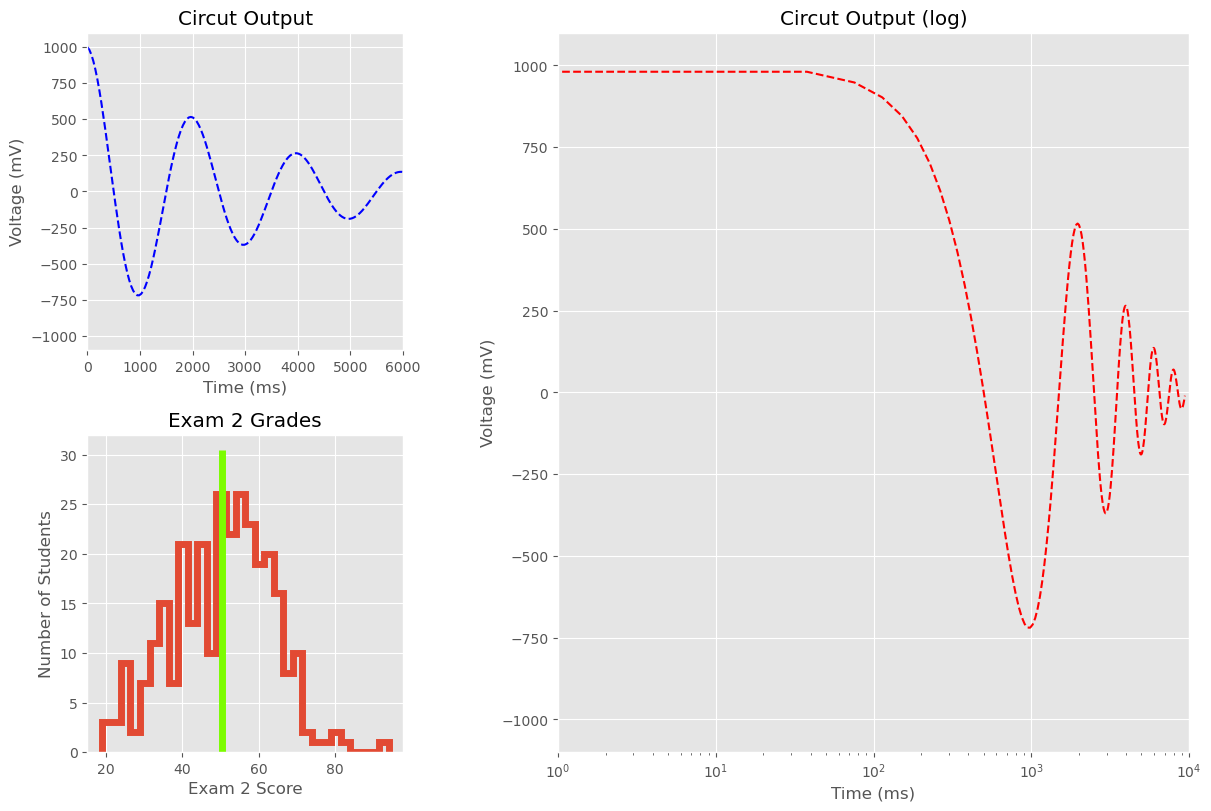

In [29]:
fig, ax = plt.subplot_mosaic(
    '''
    ACC
    BCC
    ''',
    figsize = (12, 8), 
    constrained_layout = True
)

fig.set_constrained_layout_pads(wspace = .15)

# wspace : Width padding between subplots, expressed as a fraction of the subplot width.
# hspace : Height padding between subplots, expressed as a fraction of the subplot width.

# Plot at ['A']

ax['A'].set_xlim(0.0, 6000)
ax['A'].set_ylim(-1100, 1100)

ax['A'].plot(my_x, my_y,
             color = 'b',
             marker = 'None',
             linestyle = '--')

ax['A'].set_xlabel(f'Time ({my_x.unit})')
ax['A'].set_ylabel(f'Voltage ({my_y.unit})')
ax['A'].set_title('Circut Output')

# Plot at ['B']

ax['B'].hist(grade_table['Exam2'],
             bins = 30,
             linewidth = 5,
             histtype = 'step')

ax['B'].vlines(my_average, 0, 30.5,
               color = 'LawnGreen',
               linewidth = 5,
               linestyle = '-')

ax['B'].set_title('Exam 2 Grades')
ax['B'].set_xlabel('Exam 2 Score')
ax['B'].set_ylabel('Number of Students')

# Plot at ['C'] - x-axis set to log

ax['C'].set_xscale('log')

ax['C'].set_xlim(1, 10000)
ax['C'].set_ylim(-1100, 1100)

ax['C'].plot(my_x, my_y,
             color = 'r',
             marker = 'None',
             linestyle = '--')

ax['C'].set_xlabel(f'Time ({my_x.unit})')
ax['C'].set_ylabel(f'Voltage ({my_y.unit})')
ax['C'].set_title('Circut Output (log)');

---
# Alternative Projections

## Polar Plots (`r`, $\theta$)

In [30]:
my_theta = np.linspace(0, 2*np.pi, 1000)

#### Need to add `subplot_kw={'projection': 'polar'}`

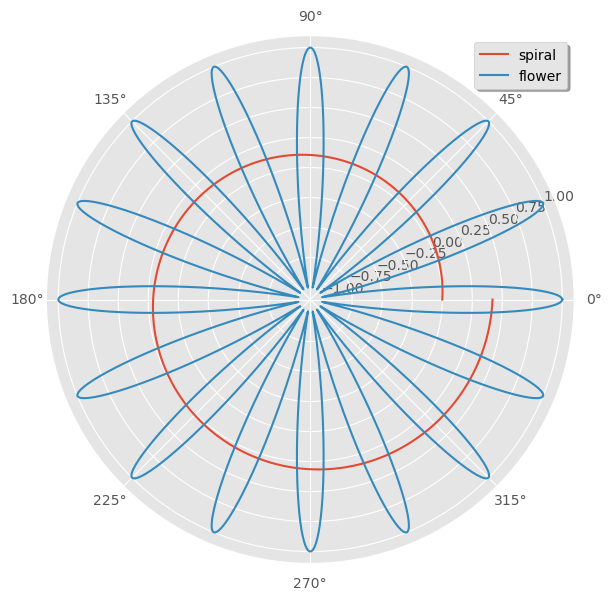

In [31]:
fig, ax = plt.subplots(
    subplot_kw={'projection': 'polar'},
    figsize = (6, 6), 
    constrained_layout = True
)

my_r = my_theta

ax.plot(my_r, my_theta/15.0,
        label="spiral")

ax.plot(my_r, np.cos(16*my_theta),
        label="flower")

ax.legend(loc=0, shadow=True);

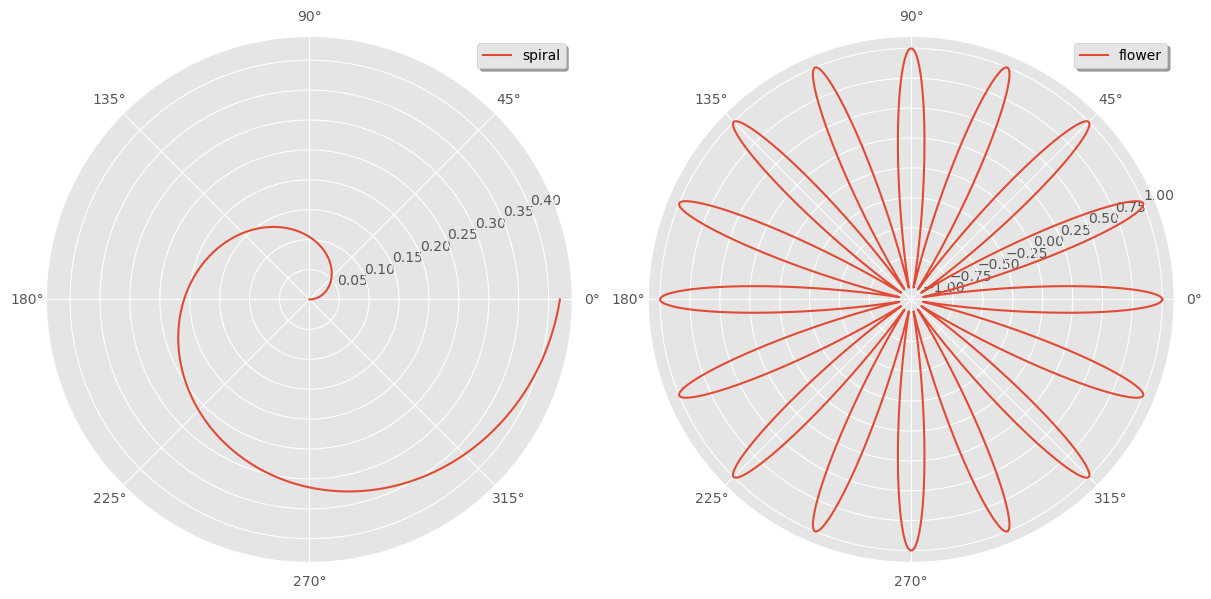

In [32]:
fig, ax = plt.subplot_mosaic(
    '''
    AB
    ''',
    subplot_kw={'projection': 'polar'},
    figsize = (12, 6), 
    constrained_layout = True
)

my_r = my_theta

ax['A'].plot(my_r, my_theta/15.0,
        label="spiral")

ax['B'].plot(my_r, np.cos(16*my_theta),
        label="flower")

ax['A'].legend(loc=0, shadow=True)
ax['B'].legend(loc=0, shadow=True);

## 3D plots `(X,Y,Z)`

In [33]:
from mpl_toolkits.mplot3d import Axes3D

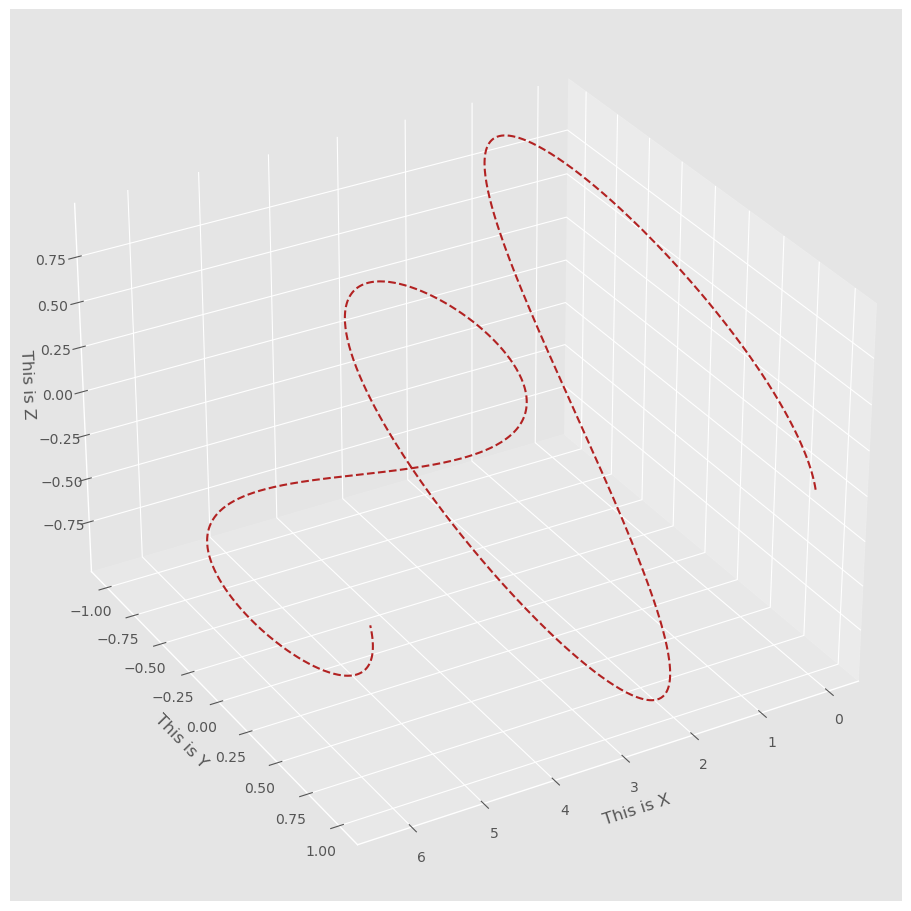

In [34]:
fig, ax = plt.subplots(
    subplot_kw={'projection': '3d'},
    figsize = (9, 9), 
    constrained_layout = True
)

ax.set_xlabel('This is X')
ax.set_ylabel('This is Y')
ax.set_zlabel('This is Z')

my_otherx = my_theta
my_othery = np.cos(3 * my_theta)
my_otherz = np.sin(2 * my_theta)

ax.plot(my_otherx, my_othery, my_otherz,
        color = 'Firebrick',
        marker = 'None',
        linestyle = '--');

ax.view_init(azim = 60, elev = 30)

---
## Tons of examples of `matplotlib` plots can be found [here](https://matplotlib.org/stable/gallery/index.html)